# **IPL Match Winner Prediction System**

# **Importing required libraries**

In [39]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# **Importing our dataset**

In [40]:

data = pd.read_csv('C:/Users/visha/OneDrive/Desktop/NxtCatch/ipl-complete-dataset-20082020/matches.csv')
data.head(10)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan
5,335987,2007/08,Jaipur,2008-04-21,League,SR Watson,Sawai Mansingh Stadium,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,bat,Rajasthan Royals,wickets,6.0,167.0,20.0,N,NaN,Aleem Dar,RB Tiffin
6,335988,2007/08,Hyderabad,2008-04-22,League,V Sehwag,"Rajiv Gandhi International Stadium, Uppal",Deccan Chargers,Delhi Daredevils,Deccan Chargers,bat,Delhi Daredevils,wickets,9.0,143.0,20.0,N,NaN,IL Howell,AM Saheba
7,335989,2007/08,Chennai,2008-04-23,League,ML Hayden,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,Chennai Super Kings,runs,6.0,209.0,20.0,N,NaN,DJ Harper,GA Pratapkumar
8,335990,2007/08,Hyderabad,2008-04-24,League,YK Pathan,"Rajiv Gandhi International Stadium, Uppal",Deccan Chargers,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,3.0,215.0,20.0,N,NaN,Asad Rauf,MR Benson
9,335991,2007/08,Chandigarh,2008-04-25,League,KC Sangakkara,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,Kings XI Punjab,runs,66.0,183.0,20.0,N,NaN,Aleem Dar,AM Saheba


In [41]:
data.tail(5)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
1090,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,bat,Sunrisers Hyderabad,wickets,4.0,215.0,20.0,N,NaN,Nitin Menon,VK Sharma
1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8.0,160.0,20.0,N,NaN,AK Chaudhary,R Pandit
1092,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,4.0,173.0,20.0,N,NaN,KN Ananthapadmanabhan,MV Saidharshan Kumar
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,Sunrisers Hyderabad,runs,36.0,176.0,20.0,N,NaN,Nitin Menon,VK Sharma
1094,1426312,2024,Chennai,2024-05-26,Final,MA Starc,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8.0,114.0,20.0,N,NaN,J Madanagopal,Nitin Menon


# **Understanding our data**

In [42]:
print("Rows and Columns of the dataset :- ",data.shape)

Rows and Columns of the dataset :-  (1095, 20)


In [43]:
data.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')

### **Column Description**

- 'id': Unique identifier for each match.

- 'city': City where the match was played.

- 'date': Date of the match.

- 'player_of_match': Name of the player who was awarded "Player of the Match."

- 'venue': Stadium or venue where the match was played.

- 'neutral_venue': Binary indicator (0 or 1) indicating if the match was played on a neutral venue (1) or not (0).

- 'team1': Name of the first team participating in the match.

- 'team2': Name of the second team participating in the match.

- 'toss_winner': Name of the team that won the toss.

- 'toss_decision': Decision taken by the toss-winning team (either 'field' or 'bat').

- 'winner': Name of the team that won the match.

- 'result': The result of the match (e.g., 'runs', 'wickets', 'tie', etc.).

- 'result_margin': The margin by which the winning team won the match (e.g., runs or wickets).

- 'umpire1': Name of the first on-field umpire.

- 'umpire2': Name of the second on-field umpire.

In [44]:
# Replacing 'Rising Pune Supergiants' with 'Rising Pune Supergiant' in the 'team1', 'team2', 'winner', and 'toss_winner' columns
data.team1.replace({'Rising Pune Supergiants': 'Rising Pune Supergiant'}, regex=True, inplace=True)
data.team2.replace({'Rising Pune Supergiants': 'Rising Pune Supergiant'}, regex=True, inplace=True)
data.winner.replace({'Rising Pune Supergiants': 'Rising Pune Supergiant'}, regex=True, inplace=True)
data.toss_winner.replace({'Rising Pune Supergiants': 'Rising Pune Supergiant'}, regex=True, inplace=True)

data.team1.replace({'Deccan Chargers': 'Sunrisers Hyderabad'}, regex=True, inplace=True)
data.team2.replace({'Deccan Chargers': 'Sunrisers Hyderabad'}, regex=True, inplace=True)
data.winner.replace({'Deccan Chargers': 'Sunrisers Hyderabad'}, regex=True, inplace=True)
data.toss_winner.replace({'Deccan Chargers': 'Sunrisers Hyderabad'}, regex=True, inplace=True)

data.team1.replace({'Delhi Daredevils': 'Delhi Capitals'}, regex=True, inplace=True)
data.team2.replace({'Delhi Daredevils': 'Delhi Capitals'}, regex=True, inplace=True)
data.winner.replace({'Delhi Daredevils': 'Delhi Capitals'}, regex=True, inplace=True)
data.toss_winner.replace({'Delhi Daredevils': 'Delhi Capitals'}, regex=True, inplace=True)

data.team1.replace({'Royal Challengers Bangalore': 'Royal Challengers Bengaluru'}, regex=True, inplace=True)
data.team2.replace({'Royal Challengers Bangalore': 'Royal Challengers Bengaluru'}, regex=True, inplace=True)
data.winner.replace({'Royal Challengers Bangalore': 'Royal Challengers Bengaluru'}, regex=True, inplace=True)
data.toss_winner.replace({'Royal Challengers Bangalore': 'Royal Challengers Bengaluru'}, regex=True, inplace=True)

C:\Users\visha\AppData\Local\Temp\ipykernel_11052\1555668475.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.team1.replace({'Rising Pune Supergiants': 'Rising Pune Supergiant'}, regex=True, inplace=True)
C:\Users\visha\AppData\Local\Temp\ipykernel_11052\1555668475.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we ar

# **Checking NULL Values**

In [45]:
data.isnull().sum()

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

In [46]:
# Fill missing values in 'city' column with 'Unknown'
data['city'].fillna('Unknown', inplace=True)

C:\Users\visha\AppData\Local\Temp\ipykernel_11052\2836370967.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['city'].fillna('Unknown', inplace=True)


In [47]:
# Fill missing values in 'player_of_match', 'result', and 'eliminator' columns with 'Not Available'
cols_to_fill = ['player_of_match', 'result']
data[cols_to_fill] = data[cols_to_fill].fillna('Not Available')

In [48]:
# Calculate the mean of the 'result_margin' column
mean_result_margin = data['result_margin'].mean()

# Fill missing values in 'result_margin' column with the mean
data['result_margin'].fillna(mean_result_margin, inplace=True)

C:\Users\visha\AppData\Local\Temp\ipykernel_11052\1386551545.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['result_margin'].fillna(mean_result_margin, inplace=True)


In [49]:
# To drop the unwanted columns
data.drop(['id','method'],axis=1,inplace=True)

In [50]:
# Drop rows with missing values in the 'winner' column
data.dropna(subset=['winner'], inplace=True)


In [51]:
data.isnull().sum()

season             0
city               0
date               0
match_type         0
player_of_match    0
venue              0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
target_runs        0
target_overs       0
super_over         0
umpire1            0
umpire2            0
dtype: int64

In [52]:
data.shape

(1090, 18)

In [53]:
# Convert the 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Extract the year from the 'date' column and create a new 'season' column
data['season'] = pd.DatetimeIndex(data['date']).year

In [54]:
data.head()

,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,umpire1,umpire2
0,2008,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Kolkata Knight Riders,Royal Challengers Bengaluru,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,Asad Rauf,RE Koertzen
1,2008,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,MR Benson,SL Shastri
2,2008,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9.0,130.0,20.0,N,Aleem Dar,GA Pratapkumar
3,2008,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bengaluru,Mumbai Indians,bat,Royal Challengers Bengaluru,wickets,5.0,166.0,20.0,N,SJ Davis,DJ Harper
4,2008,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,BF Bowden,K Hariharan


# **EDA**

In [55]:
# Extracting day, month, and year from the 'date' column
data['day'] = data['date'].dt.day
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year

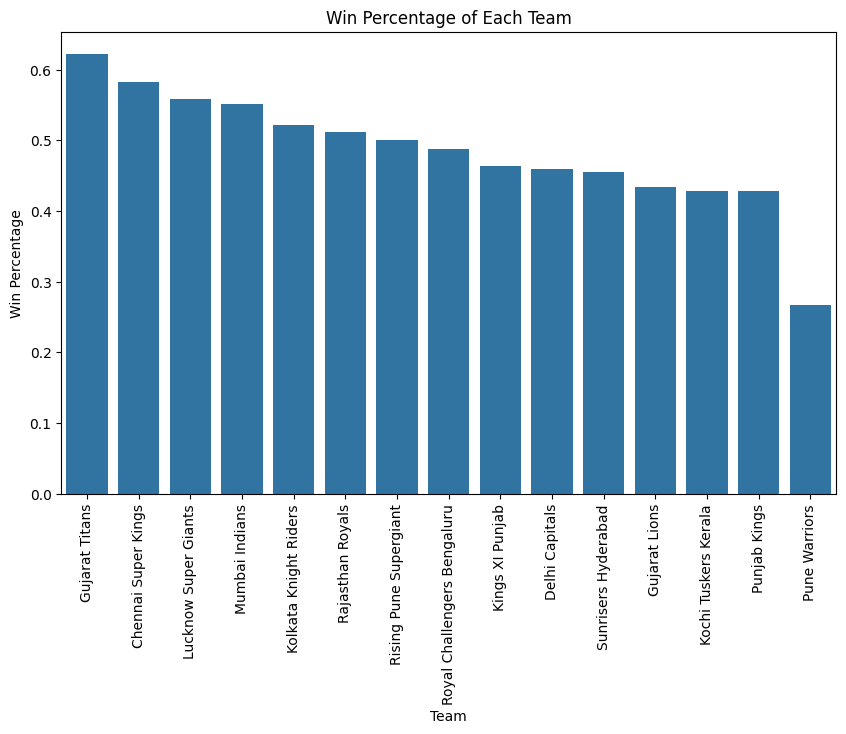

In [56]:

team_wins = data['winner'].value_counts()
team_matches = data['team1'].value_counts() + data['team2'].value_counts()
win_percentage = (team_wins / team_matches).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=win_percentage.index, y=win_percentage.values)
plt.xticks(rotation=90)
plt.xlabel('Team')
plt.ylabel('Win Percentage')
plt.title('Win Percentage of Each Team')
plt.show()


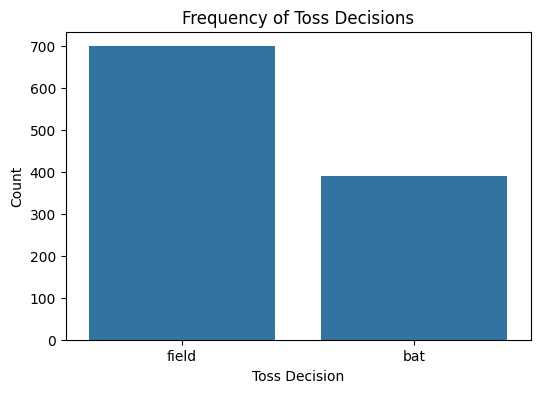

In [57]:

toss_decision_counts = data['toss_decision'].value_counts()

plt.figure(figsize=(6, 4))
sns.countplot(x='toss_decision', data=data)
plt.xlabel('Toss Decision')
plt.ylabel('Count')
plt.title('Frequency of Toss Decisions')
plt.show()


# **Data Preparation**

### **Mapping Categorical data into numerical form**
The purpose of this conversion is to transform the categorical data (team names) into numerical form, which is required for many machine learning algorithms that can only handle numerical data. By mapping team names to unique numbers, we can represent them as numerical features in the dataset, enabling us to use them in the model training process.

In [58]:
team_mapping = {
    'Kolkata Knight Riders': 1,
    'Chennai Super Kings': 2,
    'Delhi Capitals': 3,
    'Royal Challengers Bangalore': 4,
    'Rajasthan Royals': 5,
    'Kings XI Punjab': 6,
    'Sunrisers Hyderabad': 7,
    'Mumbai Indians': 8,
    'Rising Pune Supergiant': 9,
    'Kochi Tuskers Kerala': 10,
    'Gujarat Lions': 11
}
data['team1'] = data['team1'].map(team_mapping)
data['team2'] = data['team2'].map(team_mapping)

data['winner'] = data['winner'].map(team_mapping)
data['toss_winner'] = data['toss_winner'].map(team_mapping)

In [59]:
data['venue'].unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Brabourne Stadium, Mumbai',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Maharashtra Cricket Association Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sh

In [60]:
# Create a dictionary to map each unique venue name to a unique number
venue_mapping = {venue: i for i, venue in enumerate(data['venue'].unique())}

# Replace the venue names in the 'venue' column with the corresponding unique numbers
data['venue'] = data['venue'].map(venue_mapping)

In [61]:
# Create a dictionary to map 'toss_decision' values to numerical values
temp = {'field': 0, 'bat': 1}

# Use the map() function to replace 'toss_decision' values with numerical values
data['toss_decision'] = data['toss_decision'].map(temp)

In [62]:
# Create a set of unique umpires
umpires_set = set(data['umpire1'].unique()).union(set(data['umpire2'].unique()))

# Create a dictionary to map umpire names to unique numbers
umpire_dict = {umpire: i for i, umpire in enumerate(umpires_set, 1)}

# Apply the dictionary to create new encoded columns for 'umpire1' and 'umpire2'
data['umpire1'] = data['umpire1'].map(umpire_dict)
data['umpire2'] = data['umpire2'].map(umpire_dict)


In [63]:
# Create a dictionary to map each unique venue name to a unique number
player_of_match_mapping = {venue: i for i, venue in enumerate(data['player_of_match'].unique())}

# Replace the venue names in the 'venue' column with the corresponding unique numbers
data['player_of_match'] = data['player_of_match'].map(player_of_match_mapping)

In [64]:
# Create a dictionary to map each unique venue name to a unique number
city_mapping = {venue: i for i, venue in enumerate(data['city'].unique())}

# Replace the venue names in the 'venue' column with the corresponding unique numbers
data['city'] = data['city'].map(city_mapping)

In [65]:
data.head()

,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,...,result,result_margin,target_runs,target_overs,super_over,umpire1,umpire2,day,month,year
0,2008,0,2008-04-18,League,0,0,NaN,1.0,NaN,0,...,runs,140.0,223.0,20.0,N,21,51,18,4,2008
1,2008,1,2008-04-19,League,1,1,6.0,2.0,2.0,1,...,runs,33.0,241.0,20.0,N,40,13,19,4,2008
2,2008,2,2008-04-19,League,2,2,3.0,5.0,5.0,1,...,wickets,9.0,130.0,20.0,N,20,1,19,4,2008
3,2008,3,2008-04-20,League,3,3,8.0,NaN,8.0,1,...,wickets,5.0,166.0,20.0,N,47,52,20,4,2008
4,2008,4,2008-04-20,League,4,4,1.0,7.0,7.0,1,...,wickets,5.0,111.0,20.0,N,10,18,20,4,2008


In [66]:

unwanted_columns = ['date','result','eliminator','season','day','month','year']

# Check if columns exist in the DataFrame before dropping them
existing_columns = [col for col in unwanted_columns if col in data.columns]

# Drop the unwanted columns from the DataFrame
data.drop(columns=existing_columns, inplace=True)

In [67]:
data.head()

,city,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result_margin,target_runs,target_overs,super_over,umpire1,umpire2
0,0,League,0,0,NaN,1.0,NaN,0,1.0,140.0,223.0,20.0,N,21,51
1,1,League,1,1,6.0,2.0,2.0,1,2.0,33.0,241.0,20.0,N,40,13
2,2,League,2,2,3.0,5.0,5.0,1,3.0,9.0,130.0,20.0,N,20,1
3,3,League,3,3,8.0,NaN,8.0,1,NaN,5.0,166.0,20.0,N,47,52
4,4,League,4,4,1.0,7.0,7.0,1,1.0,5.0,111.0,20.0,N,10,18


# **Now we display the null values in our data**

<Axes: >

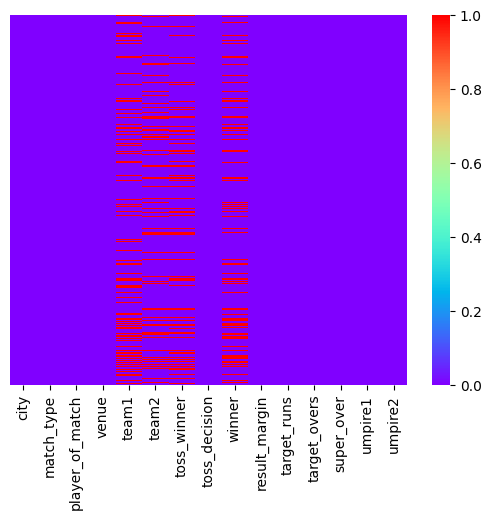

In [68]:
# checking for the null values in updated dataframe
sns.heatmap(data.isnull(),cmap='rainbow',yticklabels=False)

# **Splitting our data**

In [69]:
X = data.drop(['winner'], axis=1)
y = data['winner']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (872, 14)
y_train shape: (872,)
X_test shape: (218, 14)
y_test shape: (218,)


# **Identifying Important features**

In [71]:

y_train = y_train.dropna()
X_train = X_train.loc[y_train.index]
categorical_features = X_train.select_dtypes(include=['object']).columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough' 
)

# Creating a pipeline with the preprocessor and the regressor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=500, random_state=1))
])

# Train the RandomForestRegressor on the training data
pipeline.fit(X_train, y_train.values.ravel())

c:\Users\visha\OneDrive\Desktop\NxtCatch\environment\Lib\site-packages\sklearn\compose\_column_transformer.py:1651: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['match_type', 'super_over'], dtype='object'))])),
                ('regressor',
                 RandomForestRegressor(n_estimators=500, random_state=1))])

In [72]:
# Get the feature importances from the trained RandomForestRegressor
importances = pipeline.named_steps['regressor'].feature_importances_

# Loop over each feature and its importance
for i in range(len(importances)):
    print(f"Feature {i}: {importances[i]}")

Feature 0: 4.073784436155271e-05
Feature 1: 0.00025869456422422107
Feature 2: 0.0006304995552741811
Feature 3: 0.0013117257259899556
Feature 4: 0.0006222671425658277
Feature 5: 0.0005634446505515861
Feature 6: 0.00015287415861889157
Feature 7: 0.0009083853512237504
Feature 8: 0.0007051103390824549
Feature 9: 0.029406734147090982
Feature 10: 0.057547183781583425
Feature 11: 0.025258344411628685
Feature 12: 0.26444260628512417
Feature 13: 0.2464307400906859
Feature 14: 0.16714220569956173
Feature 15: 0.017202878842840497
Feature 16: 0.07320194896358014
Feature 17: 0.04386582952332566
Feature 18: 0.0010072589385258233
Feature 19: 0.03299028130242502
Feature 20: 0.03631024868173556


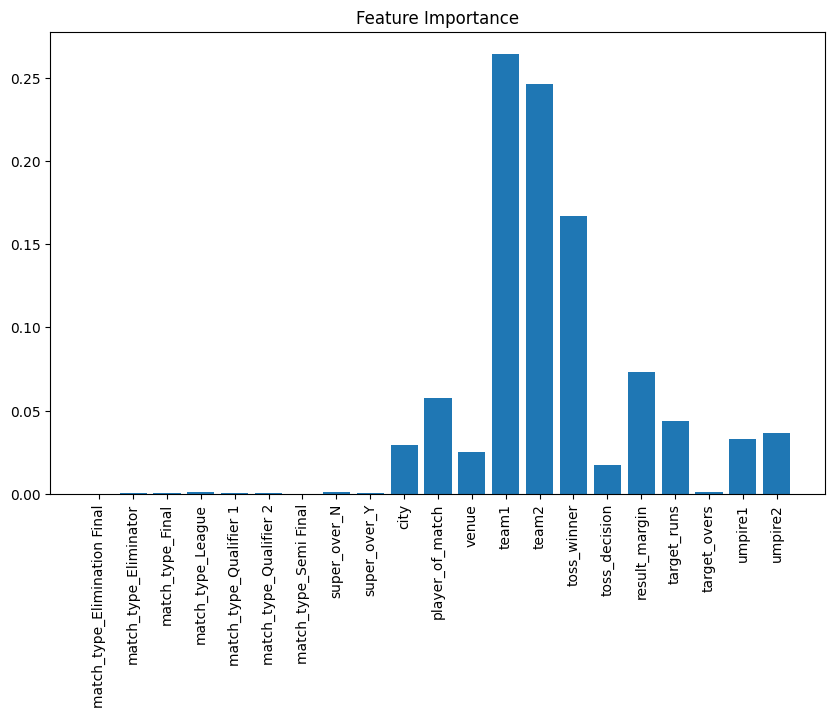

In [73]:

# Get the feature names after transformation
onehot_columns = pipeline.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(categorical_features)
all_columns = list(onehot_columns) + list(X_train.select_dtypes(exclude=['object']).columns)

plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances, align='center')
plt.title('Feature Importance')
plt.xticks(range(len(importances)), all_columns, rotation=90)
plt.show()


# **Training the Model**

### **Random Forest** 

In [74]:

y_train = y_train.dropna()
y_test = y_test.dropna()

X_train = X_train.loc[y_train.index]
X_test = X_test.loc[y_test.index]

categorical_features = X_train.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'  
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=500, random_state=1))
])
pipeline.fit(X_train, y_train.values.ravel())

y_pred_train = pipeline.predict(X_train)

r2 = r2_score(y_train, y_pred_train)
print(f"Training R^2 Score: {r2:.2f}")

y_pred_test = pipeline.predict(X_test)

r2_test = r2_score(y_test, y_pred_test)
print(f"Testing R^2 Score: {r2_test:.2f}")

# Define the model globally
model = pipeline

Training R^2 Score: 0.95
Testing R^2 Score: 0.63


In [75]:
import joblib

joblib.dump(pipeline, 'model.pkl')

['model.pkl']